In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (12, 10) # set default figure size, 8in by 6in

# The Curse of Dimensionality

Many machine learning problems in the real world involve big data.  They can have input samples that use thousands
or even millions of features for each training instance.  This makes training slow, but it can also make it harder
to find a good solution.

Dimensionality reduction helps in speeding up training by compressing the data.  It can also be a type of noise
reduction technique.  Apart from speeding up training, dimensionality reduction can be useful as a data
visualization technique.  Of course it is impossible to visualize data with more than 3 dimensions, unless you
start using other indicators like size, color, shape, etc. to visualize the higher dimenstions.  By projecting
high-dimensional data to 2 or 3 dimenstions, we can then hopefully visualize interesting aspects of the
data we might otherwise not be able to perceive.

One reason why high-dimensional data can be bad is because it can make some supervised learning techniques become
much more difficult.  It turns out many things behave very differently in high-dimensional space.  For example,
if you pick a random point on a 2D unit square (a square 1 unit in width by 1 unit in length), there is only about
a 0.4% chance of been located less than 0.001 from a border (e.g. being an extrem value, very close to an edge).
But in a 10,000-dimensional unit hypercube, the probability that you will be close to an edge is greater
than 99.999999%.  Most points in a high-dimensional hypercube are very close to a border.

As another example, two random points in a 2D unit square will be roughly 0.52 distance apart.  If you increase to
3D the average distance will be 0.66.  For a 1 million-dimensional unit hypercube, the average distance increases
to 508.25.  This is quite counerintuitive: how can two points be so far apart when they both lie within the same
unit hypercube?

These example imply that high-dimensional datasets are at risk of being very sparse: most training instances are
likely to be far away from each other, in terms of measured distance or similarity.  Many ML techniques rely on
distance or similarity to learn classifications of data, so this implies it can become much more difficult a task
as dimensionality increases.

In theory, we can eaither increase the size of the dataset so that we reach sufficient density of the training
instances.  Unfortunately the number of training instances required to reach a given density grows exponentially with
the number of dimensions.  So another common solution is to try and reduce the number of dimensions.  This will
tend to reduce the issues we just described.

# Main Approaches for Dimensionality Reduction

## Projection

In most real-world problems, training instances are *not* spread out uniformly across all dimensions.  Some
dimensions are almost constant (thus have little variance, and thus not much information).  Other dimensions are
highly correlated (2 dimensions that are completely or highly correlated can effectively achieve the
same performance using only 1 of the 2).  As a result, for most real-world data, all training instances
actually lie within (or close to) a much lower-dimensional *subspace* of the high-dimensional space.  

## Manifold Learning

Projection is not always the best approach to dimensionality reduction.  Sometimes the data subspaces
might twist and turn (in a non-linear way).  Simply projecting onto a hyperplane would squash different layers.
A manifold can be learned in such more complicated situations.  A manifold is simply a hyperplane/shape but that
has been twisted and bent to fold it into a higher dimensional space.  

# Principal Component Analysis (PCA)

Principal Component Analysis, or PCA, is by far the most popular dimensionality reduction algorithm.
It is an example of a projection method.  It first identifies the hyperplane that lies closest to the data,
and then it projects the data onto it.

First I'll create a random data set that looks similar to textbook 8-7 by generating data that is randomly
distributed on two features, then we rotat it 45 degrees using a linear algebra transformation.

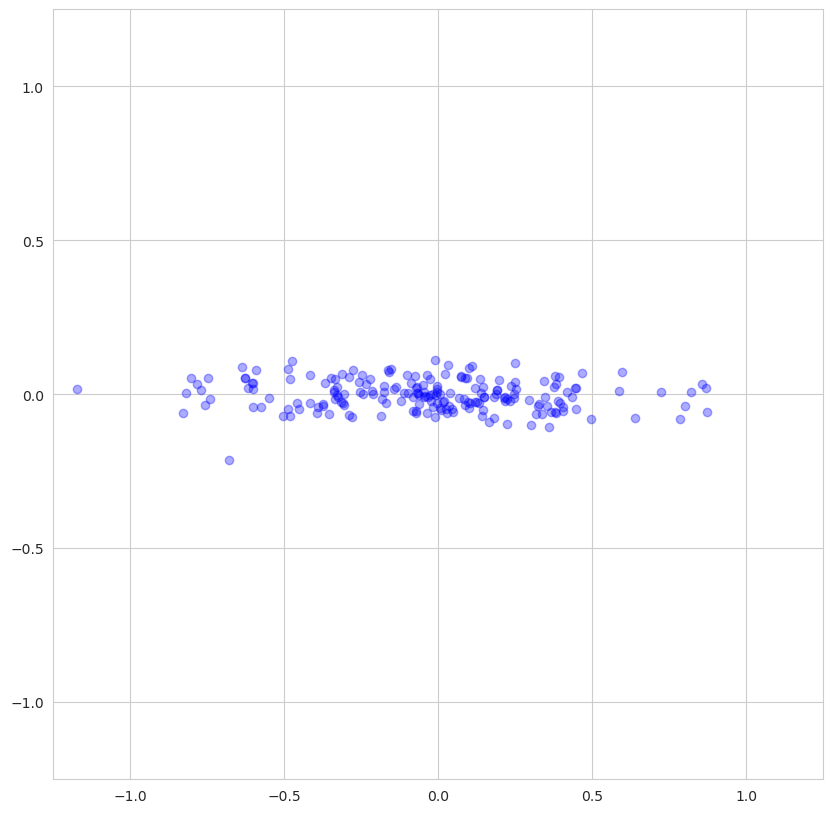

In [3]:
# number of samples to generate
m = 200

# array to hold randomly generated data
X = np.empty((m, 2))

# standard deviation of x_1 dimension is large
x_1_scale = 0.4
X[:,0] = np.random.normal(loc=0.0, scale=x_1_scale, size=m)

# standard deviation of x_2 dimension is small
x_2_scale = 0.05
X[:,1] = np.random.normal(loc=0.0, scale=x_2_scale, size=m)

# show the results so far
plt.plot(X[:,0], X[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box');
#plt.grid();

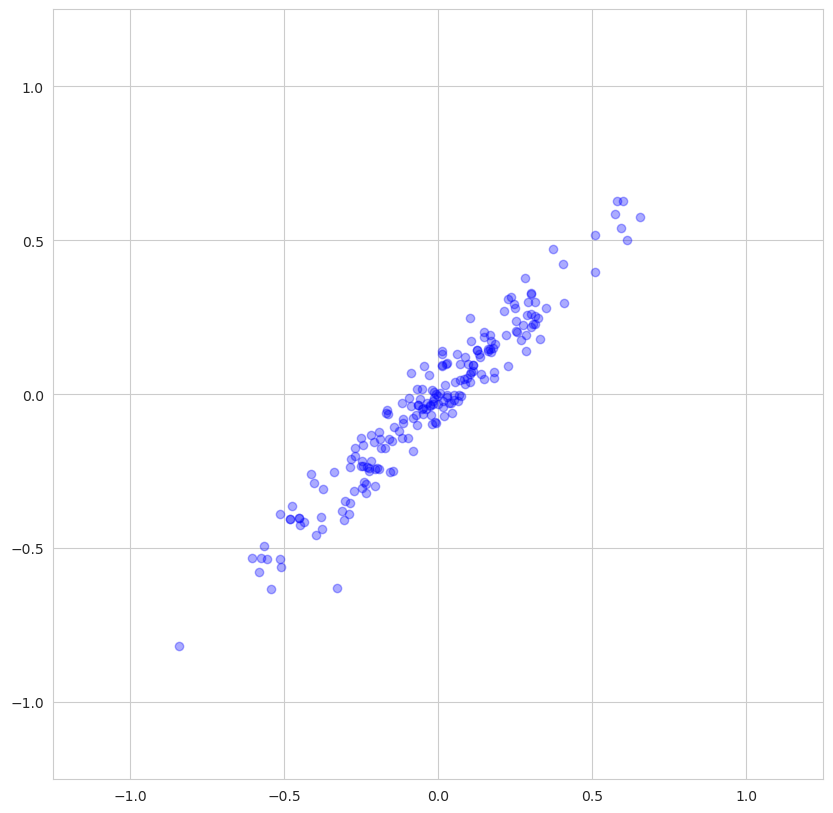

In [4]:
# use a little linear algebra, create a rotation matrix and use it to rotate 45 degrees
theta = np.radians(-45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c,-s), (s, c)))

# will rotate points by the degrees given
X = np.dot(X, R)

# show the results after rotation
plt.plot(X[:,0], X[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box');
#plt.grid();

## Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, you first need to
choose the right hyperplane.  So the above example 2D data could be projected onto any 1D vector or
axis we might choose.

TODO: draw example vectors c1, c2, c3 vectors on above data.

It seems reasonable to select the axis that preserves the maximum amount of variance (the amount of
variance explained), as it will most likely lose less information that the other projections.

Once the principal axis is selected, for a higher-dimensional projection the next largest axis would
be determined.  All subsequent projection axis will be orthogonal to the first determined
maximal axis of variance.


In [5]:
# apply PCA,project to 2 dimensions, but this will undo the rotation
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2d = pca.fit_transform(X)

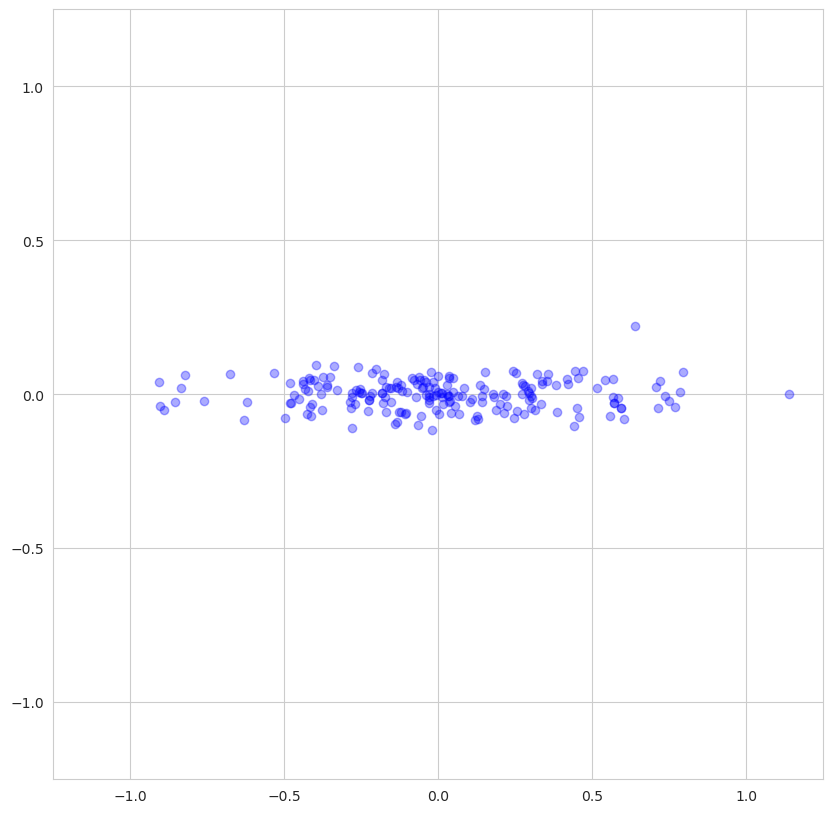

In [6]:
# show the results after PCA,
plt.plot(X2d[:,0], X2d[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box');
#plt.grid();

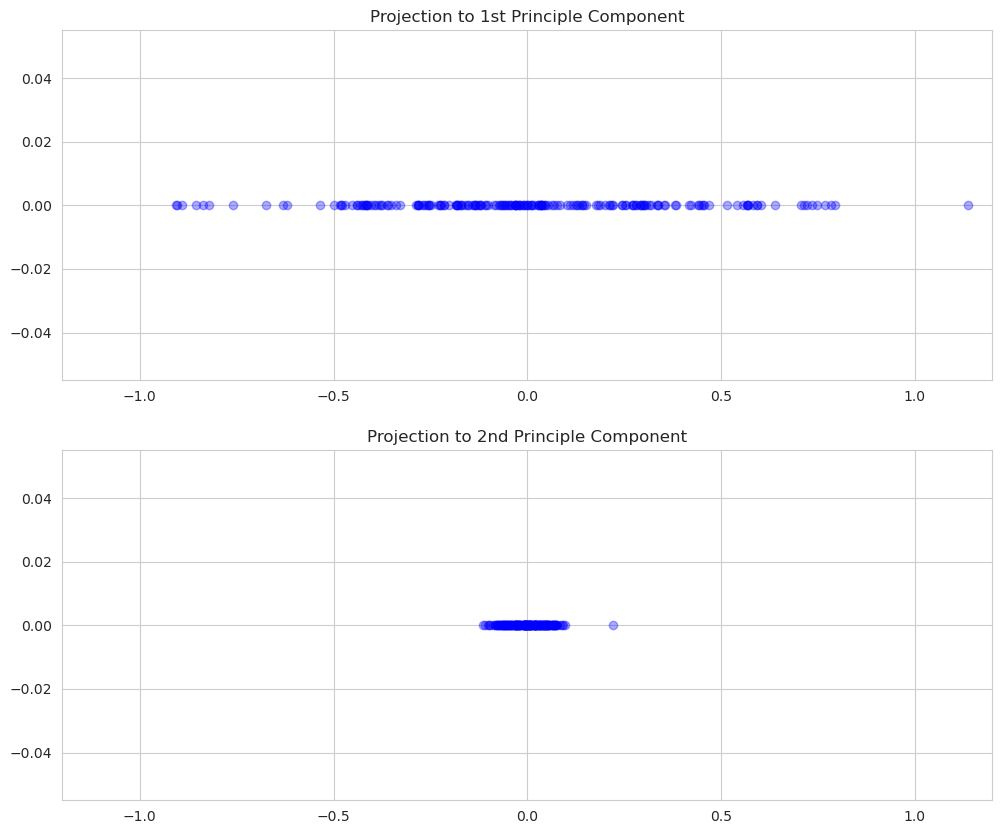

In [7]:
# we can use the .components_ to access the principle component projections
# visualze first principle component project to a 1D hyperplane (to a line)
plt.subplot(2,1,1)
plt.plot(X2d[:,0], np.zeros(m), 'bo', alpha=0.33)
plt.xlim(-1.2, 1.2)
plt.title("Projection to 1st Principle Component");
#plt.grid();

# visualze second principle component project to a 1D hyperplane (to a line)
plt.subplot(2,1,2)
plt.plot(X2d[:,1], np.zeros(m), 'bo', alpha=0.33)
plt.xlim(-1.2, 1.2)
plt.title("Projection to 2nd Principle Component");
#plt.grid();

## Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the
training set.  It also finds a second axis, orthogonal to the first one, that accounts for the
remaining variance.  In the 2D example there is no choice, once the first axis is found the
next one make a 90 degree (orthogonal) axis with the first.  But for higher dimensional
data, there are more than 1 orthogonal axis to choose from.

The standard matrix factorizaiton technique called *Singular Value Decomposition* will compute
the principla component axis vectors for a set of data.  

## Projecting Down to d Dimensions

Once you hav identified the principal component axis, you can reduce dimensionality of the dataset down to $d$
dimensions by projecting it onto the hyperplane defined by the first $d$ principal compoments. This
is accomplished simply by multiplying the original data $X$ times the reduced $U$ matrix.

## Using Scikit-Learn

Scikit-Learn's PCA implements PCA using SVD decomposition.  It also automatically takes care of
centering and normalizing the data for you (mean centering and standard deviation normalization).

# In Depth: Principal Component Analysis

[reference](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

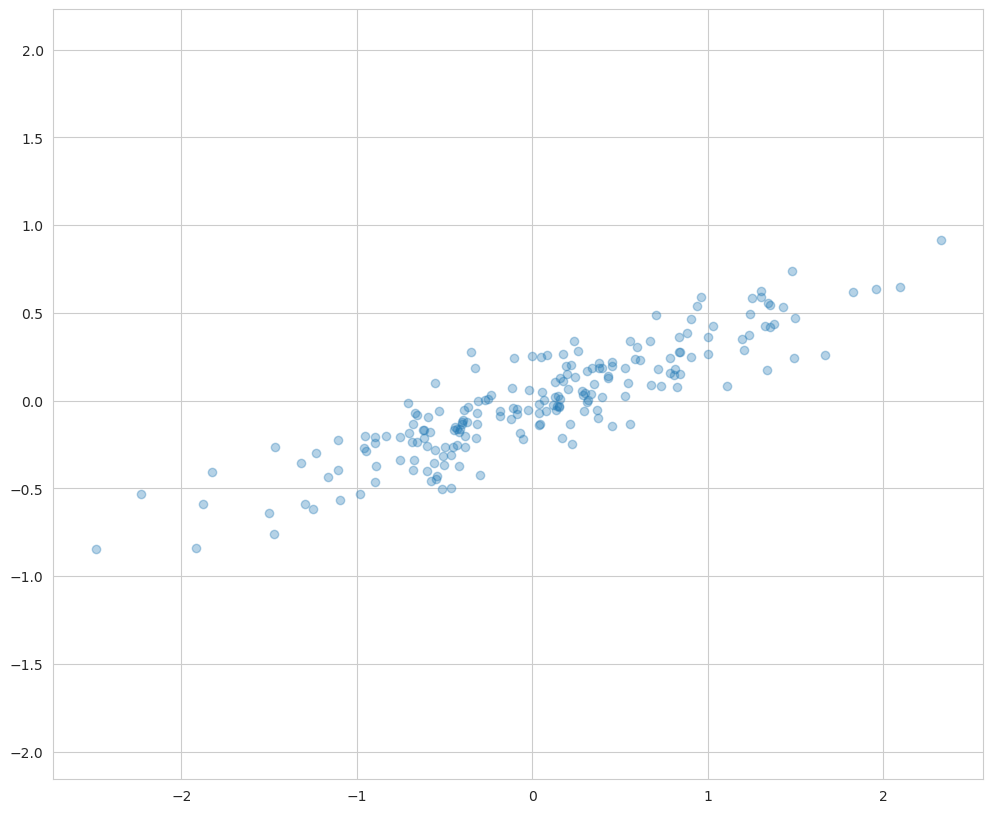

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=0.33)
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression algorithm we explored, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)


PCA(n_components=2, whiten=True)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [10]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [11]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


The components represent the vectors or axis of the principal components.  Here as shown each row represents
a vector.  If you draw a vector from the mean location to the corrdinates of the first row 
$[-0.94446029 -0.32862557]$, you will see the direction of the first principal component.  We
can use the `explained_variance` to modify the lenght of this vector, to indicate the relative importance
of each principle component.

In the following code, we draw an error based on the 2 vectors shown, but modify the length
based on the explained variance, to visualize the 2 principal compoments of the data.

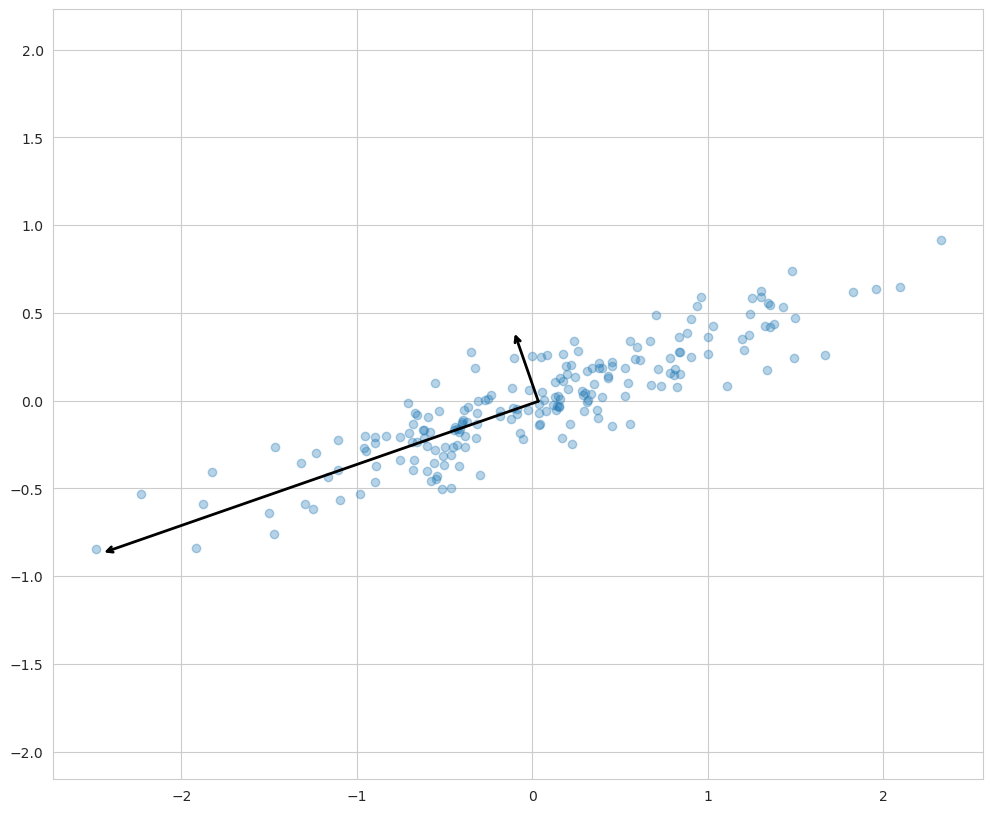

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color='black',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.33)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

#pc = pca.components_[0] # first principal component
#plt.plot(pc[0], pc[1], 'ro');

#pc = pca.components_[1] # second principal component
#plt.plot(pc[0], pc[1], 'ro');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here (think of it as if
I grab the arrows, flip them, rotate to standard x,y directions and grow the shorter one
so they are both equal length):


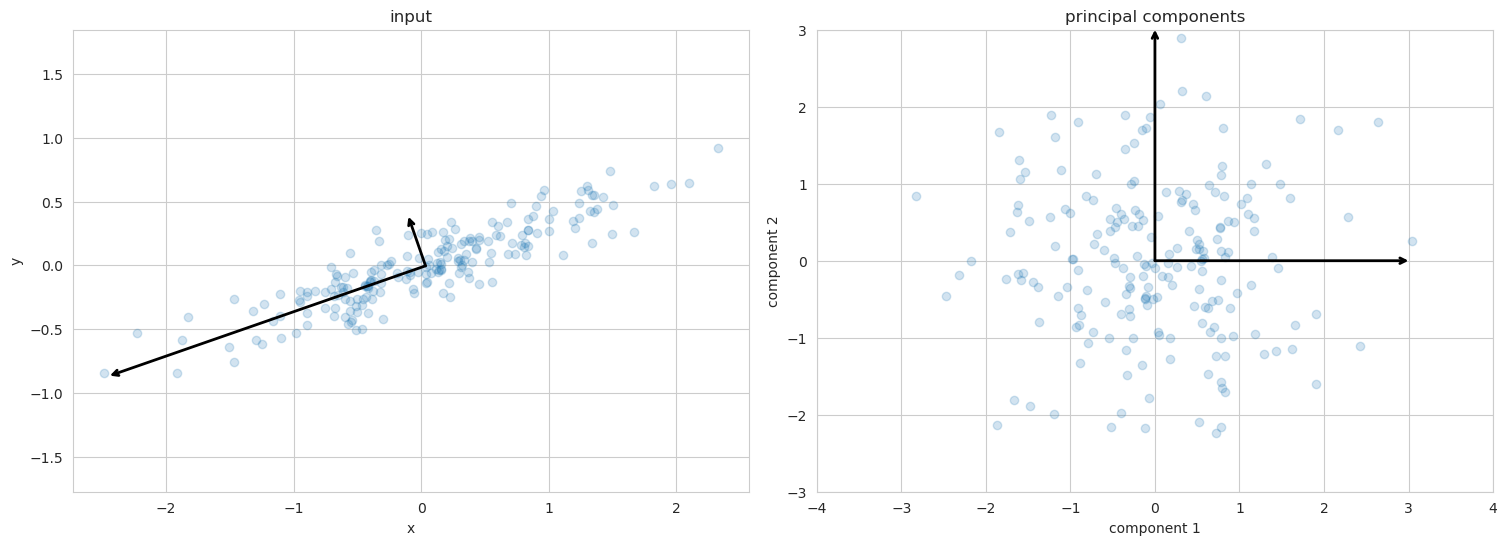

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.xlabel('x')
plt.ylabel('y')
plt.title('input')

# plot principal components
X_pca = pca.transform(X)
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
#plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('principal components');
draw_vector([0, 0], [0, 3])
draw_vector([0, 0], [3, 0])


This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.


## Perform PCA By Hand

Here lets perform the same transformation that `scikit-learn` is doing, but by hand using the linear algebra
operations from `NumPy`.

In the previous PCA using `scikit-learn` we set `whiten=True`.  By default `scikit-learn` will always
perform mean normalization before doing the PCA. If you want to perform scaling so that all dimensions have the
same standard deviation, then you need to specify the `whiten` to be true.  The effect is that the final stretching
of all principal components will be done so that in the projection all new dimensions have equal standard
deviation.  You can set `whiten=False` above to see how the final scaling/stretching is not performed.

To recreate the `scikit-learn` results, we fist need to perform mean normalizaiton and standard deviation scaling.
If you perform the next cells on the `X_norm_scaled` you should get the same results as when `whiten=True` with
`scikit-learn`.  If you use only the `X_norm` which is the result only after mean normalization, this should give
the same results when you set `whiten=False`.

In [14]:
# perform pca by hand

# first perform mean normalization and scaling
mu = np.mean(X, axis=0)
sd =  np.std(X, axis=0)

X_norm = X - mu
X_norm_scaled = (X - mu) / sd

# extract m, number of samples
# extract n, number of features/dimensions
m,n = X_norm_scaled.shape


As described, PCA first needs to find the principle components.  This is equivalent to computing the eigenvectors
of the X data matrix, where the eigenvalues gives the relative importance of each of the resulting vectors.
We can use `np.linalg.eig()` to compute the eigenvectors and eigenvalues.  We can also use
`np.linalg.svd()` on the covariance matrix.

So as an example, we compute the covariance matrix $\Sigma$ (Sigma), then use SVD to decompose the covariance
matrix into its eigenvectors.  Here matrix $U$ will contain the eigenvectors, which will correspond to the
`components_` returned by `scikit-learn`.

In [15]:
# compute covariance matrix Sigma
#Sigma = (1.0 / m) * np.dot(X_norm_scaled.T, X_norm_scaled)
Sigma = (1.0 / m) * np.dot(X_norm.T, X_norm)
#Sigma = (1.0 / m) * np.dot(X.T, X)
#print(Sigma.shape)
#print(Sigma)


# perform singular value decomposition
U, S, V = np.linalg.svd(Sigma)
print(U.shape)
print(S.shape)
print(V.shape)

# U vectors represent the transformed space
# should be equivalent to pca.components_
print(U)
print(S)

(2, 2)
(2,)
(2, 2)
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.75871884 0.01838551]


The final step once the principle components have been computed is to do the rotation and scaling to project
the original space onto the newly defined space.  This can be accomplished simply by doing a matrix
multiplication of the $U$ matrix times our original data $X$:

In [16]:
# compute the pca.transform
#X_pca = np.dot(X_norm_scaled, U)
X_pca = np.dot(X_norm, U)
#X_pca = np.dot(X, U)

sd =  np.std(X_pca, axis=0)
mu = 0.0
X_pca_scaled = (X_pca - mu) / sd


This should result in the same transformation as `scikit-learn` achieved.

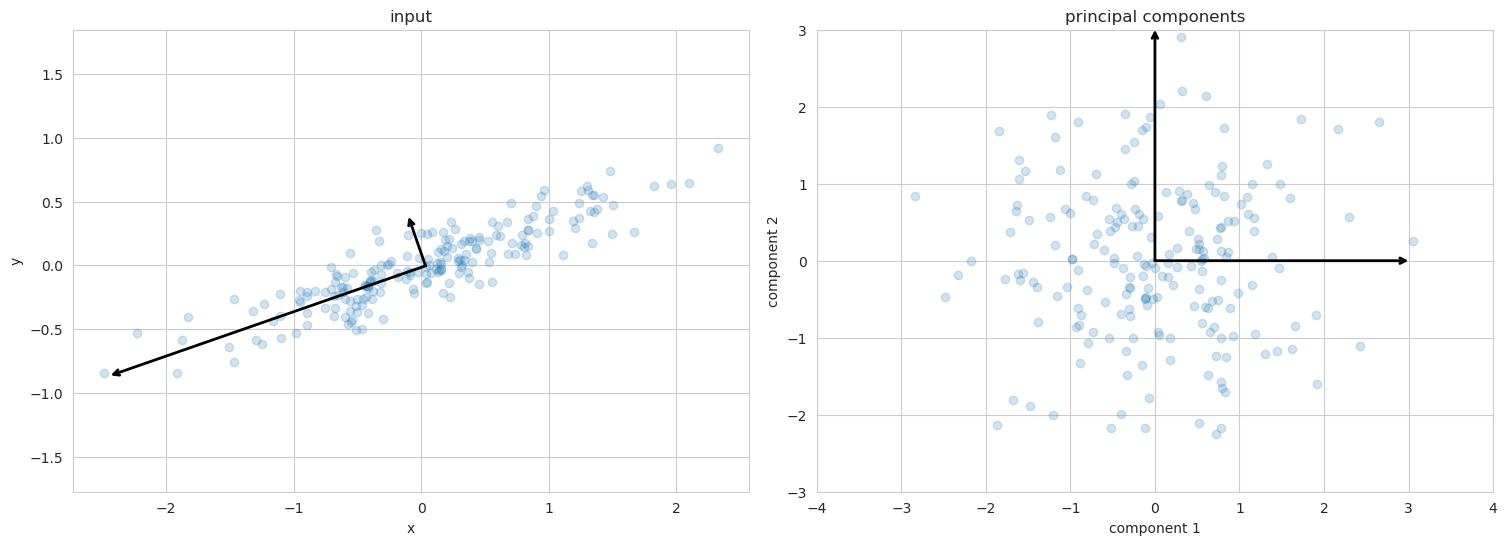

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(S, U):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.xlabel('x')
plt.ylabel('y')
plt.title('input')

# plot principal components
plt.subplot(1,2,2)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
#plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('principal components');
draw_vector([0, 0], [0, 3])
draw_vector([0, 0], [3, 0])


## PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [18]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

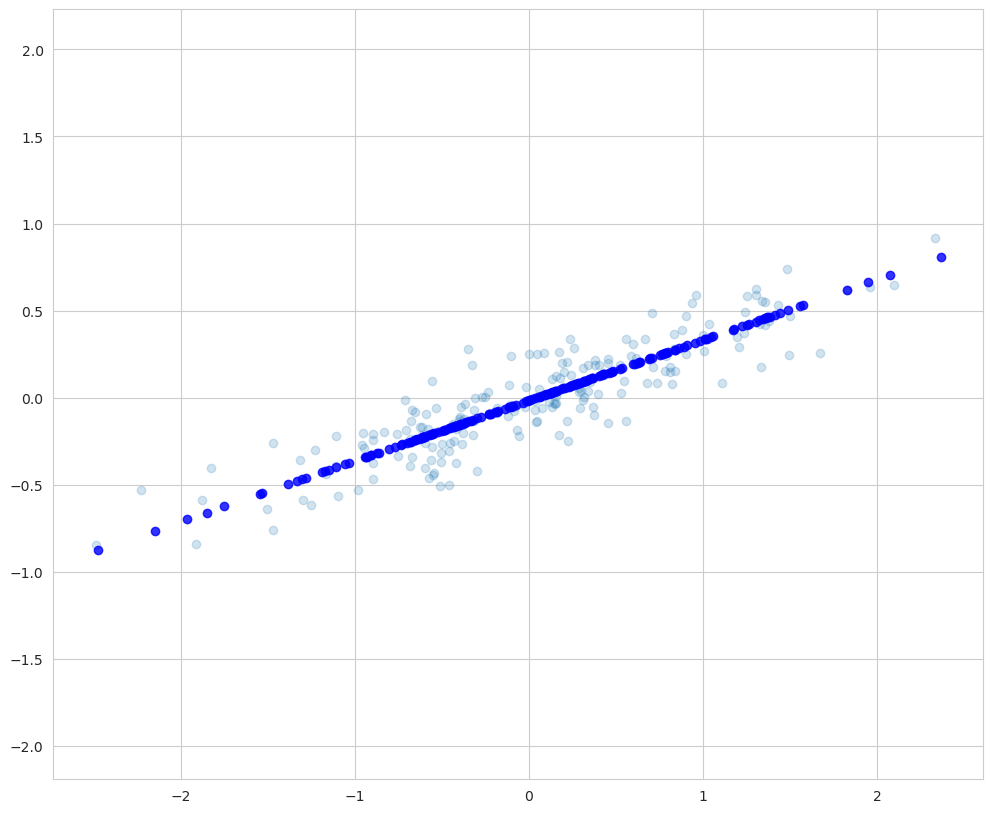

In [19]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='blue')
plt.axis('equal');


The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.


## PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the MNIST digits we have seen before.

We start by loading the data.

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [21]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

/tmp/ipykernel_3939/2943749715.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


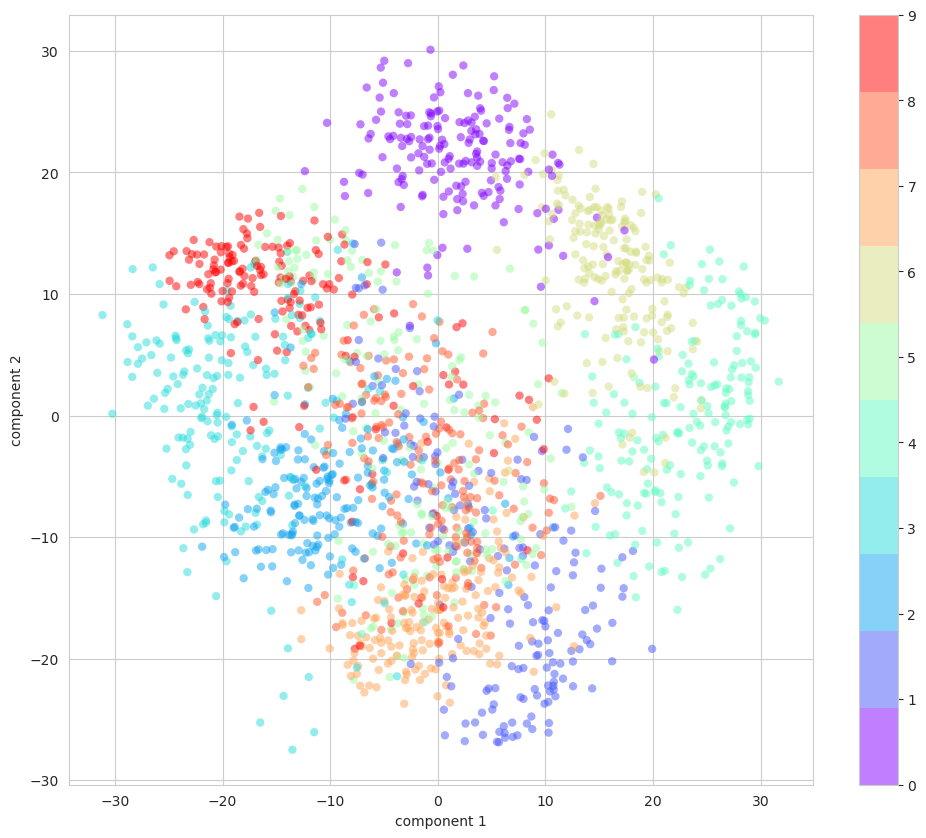

In [22]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

## Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

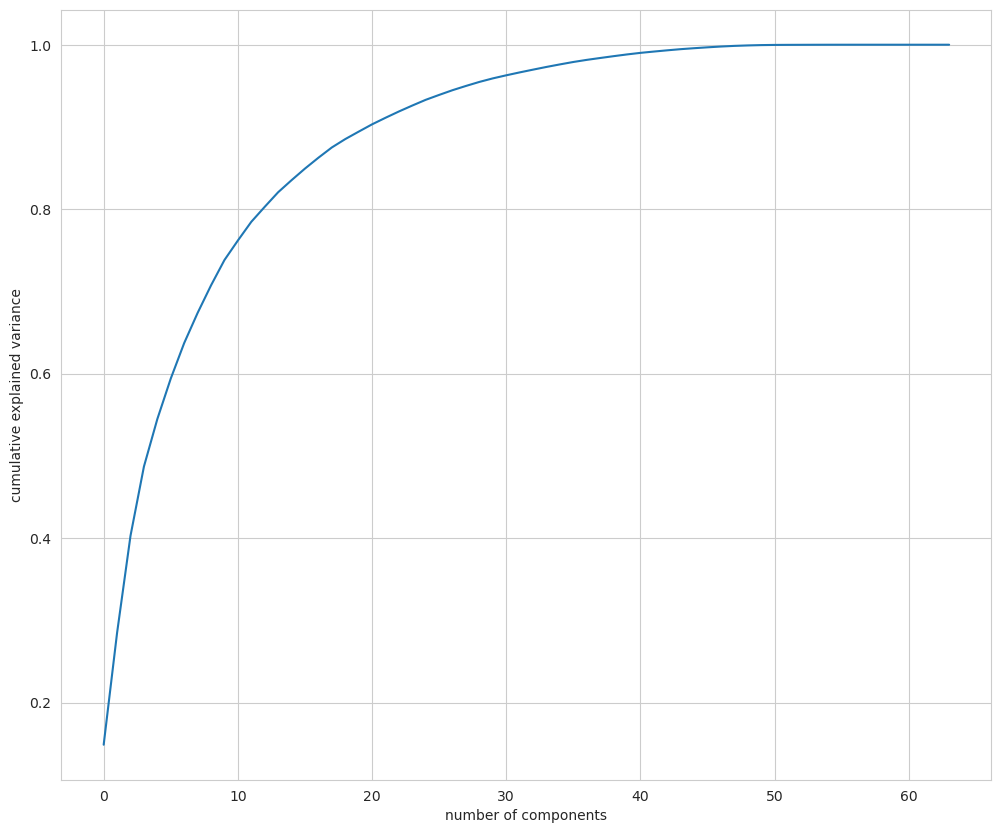

In [23]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N

components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

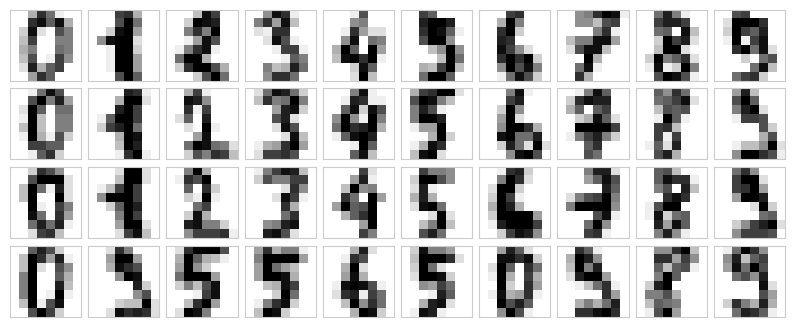

In [24]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)



Now lets add some random noise to create a noisy dataset, and re-plot it:

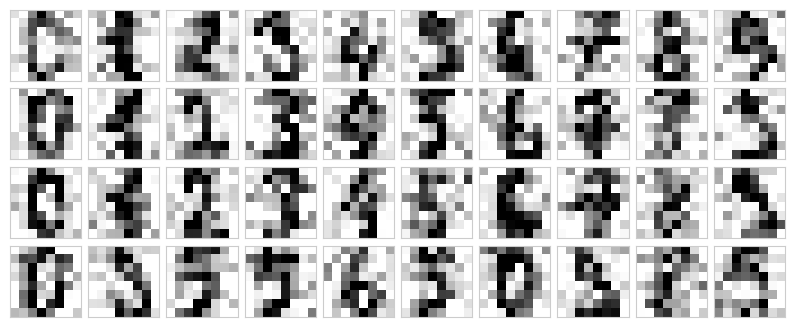

In [25]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [26]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

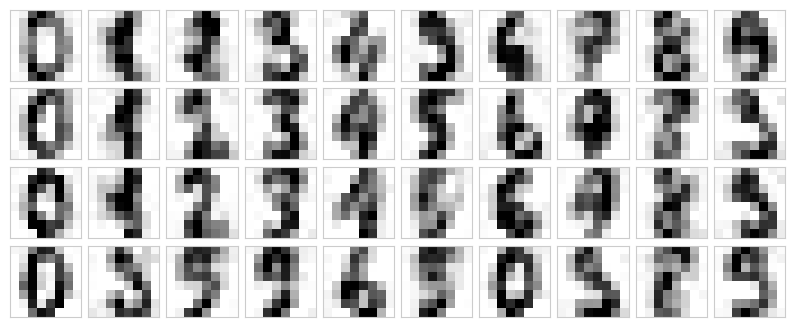

In [27]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Example: Eigenfaces

Here we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [28]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). We will take a look at the first 150 components:

In [29]:
pca = PCA(150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized', whiten=True)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). As you can see in this figure, they are as creepy as they sound:

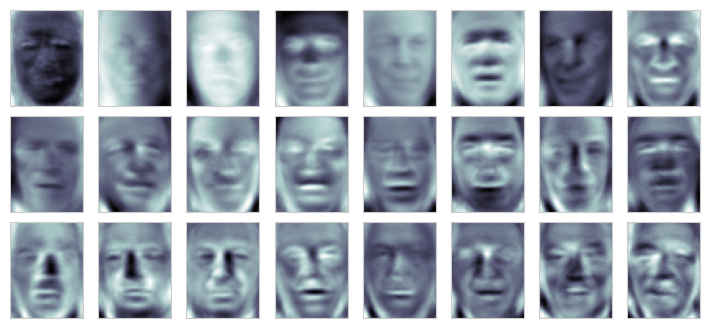

In [30]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

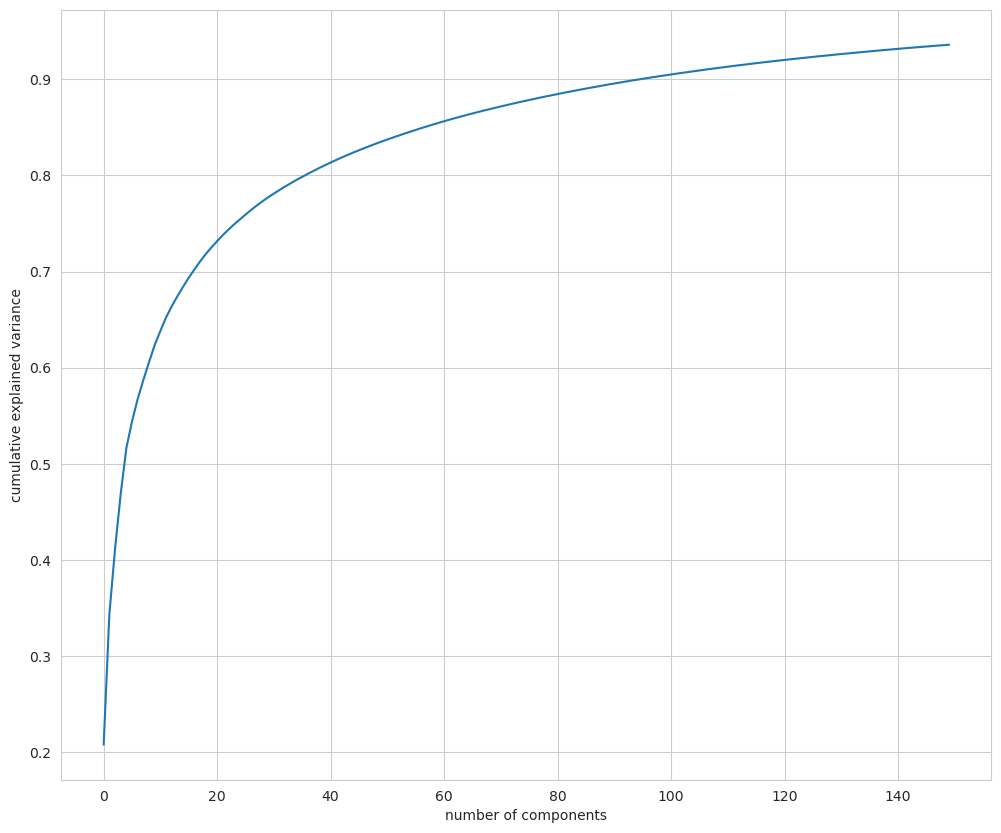

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [32]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized', whiten=True).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

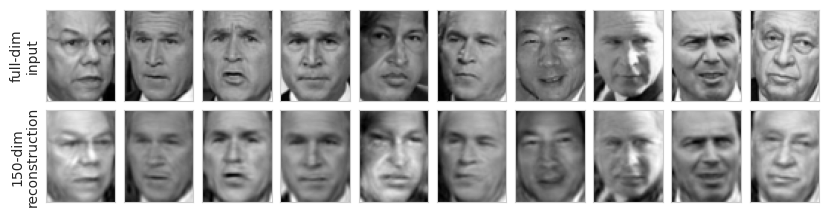

In [33]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

In [34]:
import sys
sys.path.append("../../src") # add our class modules to the system PYTHON_PATH

from ml_python_class.custom_funcs import version_information
version_information()

              Module   Versions
--------------------   ------------------------------------------------------------
         matplotlib:   ['3.7.2']
              numpy:   ['1.25.2']
             pandas:   ['2.0.3']
            seaborn:   ['0.12.2']
